# **NLP EXPERIMENT 01: TEXT PREPROCESSING**

**Name:** Nabila Tajrin Bristy\
**PRN:** 1262243611\
PGD AI&ML (2024-25)\
MIT WPU

# **Part A: Operations on a Single Sentence**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-22-4e42ac4d115c>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(word_counts.keys()), y=list(word_counts.values()), palette="viridis")


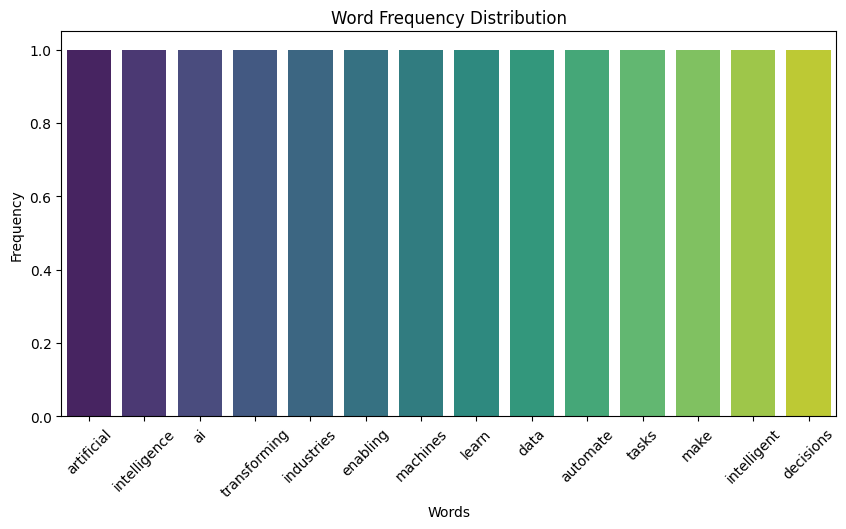

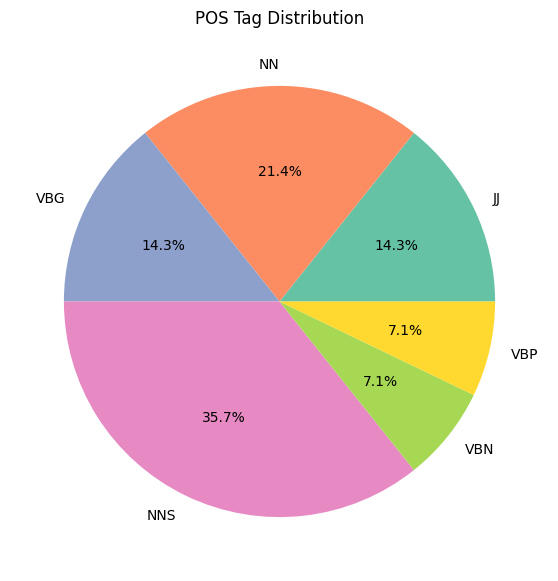

<ipython-input-22-4e42ac4d115c>:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[" ".join(b) for b in bigram_counts.keys()], y=list(bigram_counts.values()), palette="magma")


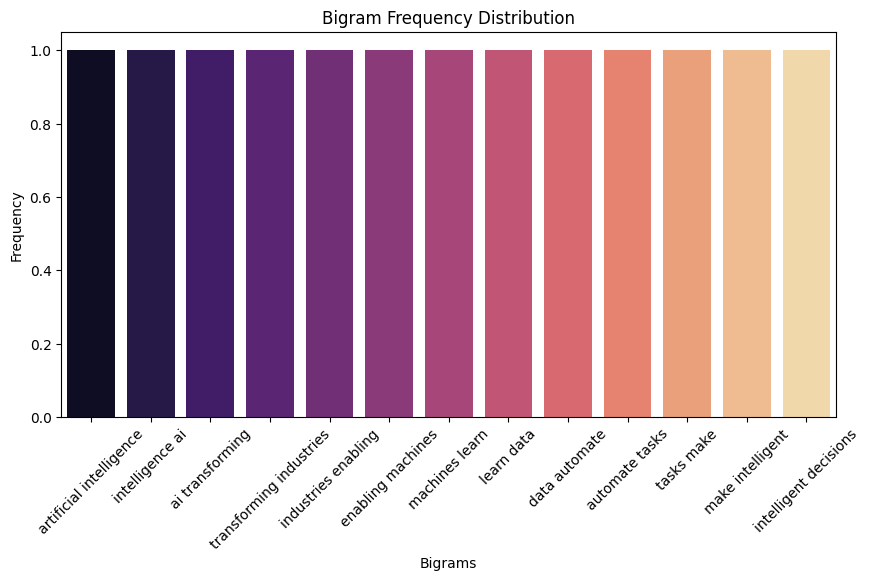

<ipython-input-22-4e42ac4d115c>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[" ".join(t) for t in trigram_counts.keys()], y=list(trigram_counts.values()), palette="coolwarm")


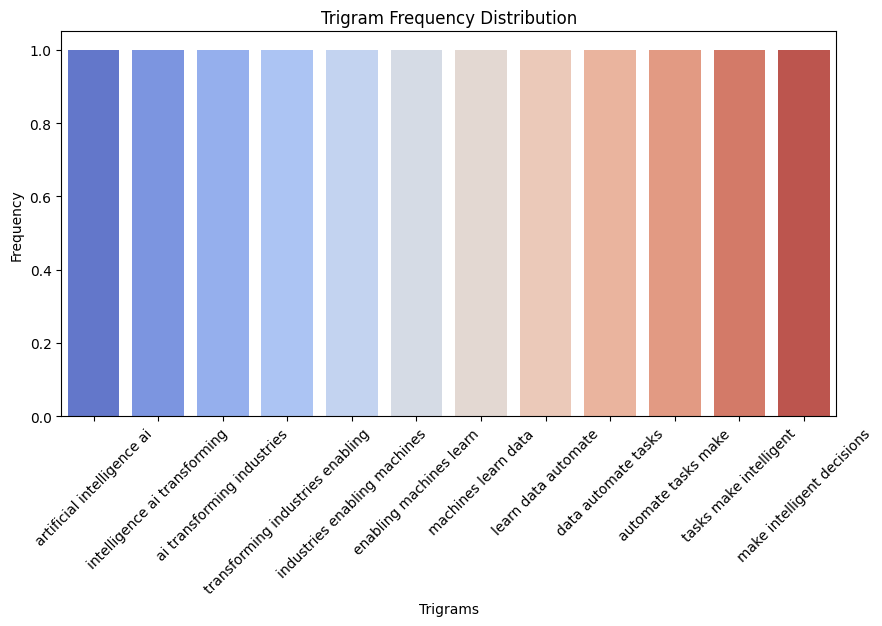

Original Sentence: artificial intelligence (ai) is transforming industries by enabling machines to learn from data, automate tasks, and make intelligent decisions.
Tokenized Words: ['artificial', 'intelligence', '(', 'ai', ')', 'is', 'transforming', 'industries', 'by', 'enabling', 'machines', 'to', 'learn', 'from', 'data', ',', 'automate', 'tasks', ',', 'and', 'make', 'intelligent', 'decisions', '.']
Filtered Tokens (Stopwords & Punctuation Removed): ['artificial', 'intelligence', 'ai', 'transforming', 'industries', 'enabling', 'machines', 'learn', 'data', 'automate', 'tasks', 'make', 'intelligent', 'decisions']
Stemmed Tokens: ['artifici', 'intellig', 'ai', 'transform', 'industri', 'enabl', 'machin', 'learn', 'data', 'autom', 'task', 'make', 'intellig', 'decis']
Lemmatized Tokens: ['artificial', 'intelligence', 'ai', 'transform', 'industry', 'enable', 'machine', 'learn', 'data', 'automate', 'task', 'make', 'intelligent', 'decision']


In [22]:
import nltk
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from nltk.util import ngrams

# Ensure necessary NLTK downloads
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

# Function to convert POS tags to WordNet format
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default case

# Sample text
sentence = "Artificial intelligence (AI) is transforming industries by enabling machines to learn from data, automate tasks, and make intelligent decisions.  "

# 1. Trim spaces
sentence = sentence.strip()

# 2. Convert to lowercase
sentence = sentence.lower()

# 3. Remove unwanted words (Marks, Teacher’s Signature, URLs, Expt. 1-2)
sentence = re.sub(r'\b(marks|teacher’s signature with date|expt\.\s*\d+-\d+|www\.\S+)\b', '', sentence)

# 4. Tokenization
tokens = word_tokenize(sentence)

# 5. Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# 6. Remove punctuation
filtered_tokens = [word for word in filtered_tokens if word not in string.punctuation]

# 7. Stemming & Lemmatization
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tag(filtered_tokens)]

# ---------------- Visualizations ----------------

## 🔹 Word Frequency Chart
word_counts = Counter(filtered_tokens)
plt.figure(figsize=(10,5))
sns.barplot(x=list(word_counts.keys()), y=list(word_counts.values()), palette="viridis")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution")
plt.xticks(rotation=45)
plt.show()

## 🔹 POS Distribution Pie Chart
pos_counts = Counter(tag for word, tag in pos_tag(filtered_tokens))
plt.figure(figsize=(7,7))
plt.pie(pos_counts.values(), labels=pos_counts.keys(), autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title("POS Tag Distribution")
plt.show()

## 🔹 Bigram and Trigram Visualization
bigrams = list(ngrams(filtered_tokens, 2))
trigrams = list(ngrams(filtered_tokens, 3))

bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

# Bigram Chart
plt.figure(figsize=(10,5))
sns.barplot(x=[" ".join(b) for b in bigram_counts.keys()], y=list(bigram_counts.values()), palette="magma")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.title("Bigram Frequency Distribution")
plt.xticks(rotation=45)
plt.show()

# Trigram Chart
plt.figure(figsize=(10,5))
sns.barplot(x=[" ".join(t) for t in trigram_counts.keys()], y=list(trigram_counts.values()), palette="coolwarm")
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.title("Trigram Frequency Distribution")
plt.xticks(rotation=45)
plt.show()

# ---------------- Print Results ----------------
print(f"Original Sentence: {sentence}")
print(f"Tokenized Words: {tokens}")
print(f"Filtered Tokens (Stopwords & Punctuation Removed): {filtered_tokens}")
print(f"Stemmed Tokens: {stemmed_tokens}")
print(f"Lemmatized Tokens: {lemmatized_tokens}")


# **Part B: Operations on sample1.txt**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The Evolution of Artificial Intelligence

Artificial Intelligence (AI) refers to the simulation of human intelligence in machines that are programmed to think and act like humans. The concept of AI has been around for centuries, with its roots tracing back to ancient myths and stories about mechanical beings capable of performing human-like tasks. However, the modern field of AI as we know it began in the 20th century, with advances in computer science, mathematics, and logic.

In the early days
Number of unique tokens: 296
Number of punctuation characters: 80


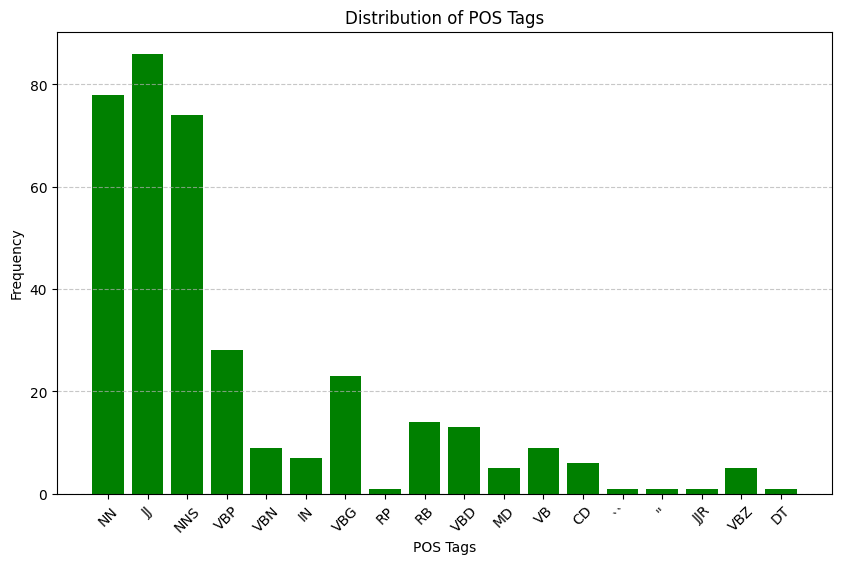

Number of unique lemmas: 236


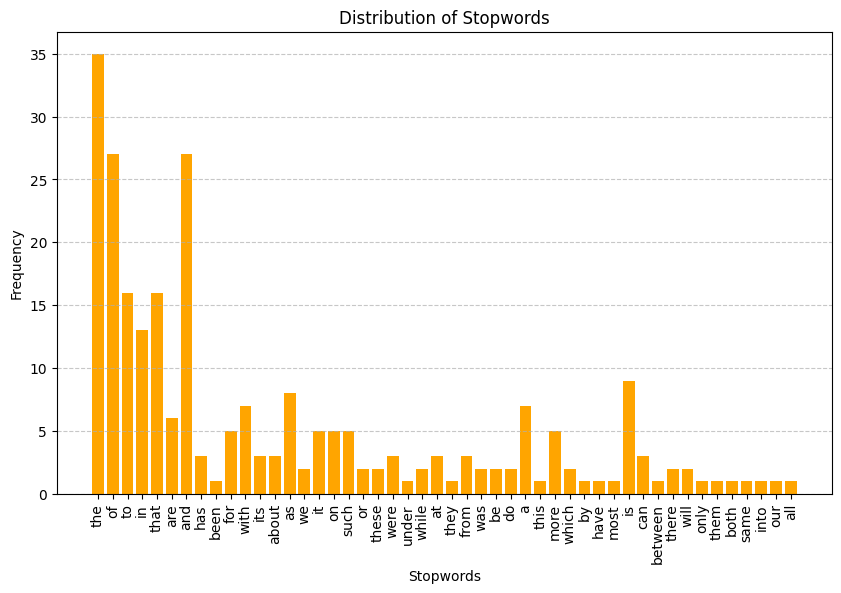


Top 10 Most Frequent Words:
ai: 23
systems: 9
human: 5
machines: 5
tasks: 5
could: 5
learning: 5
language: 5
data: 4
artificial: 3


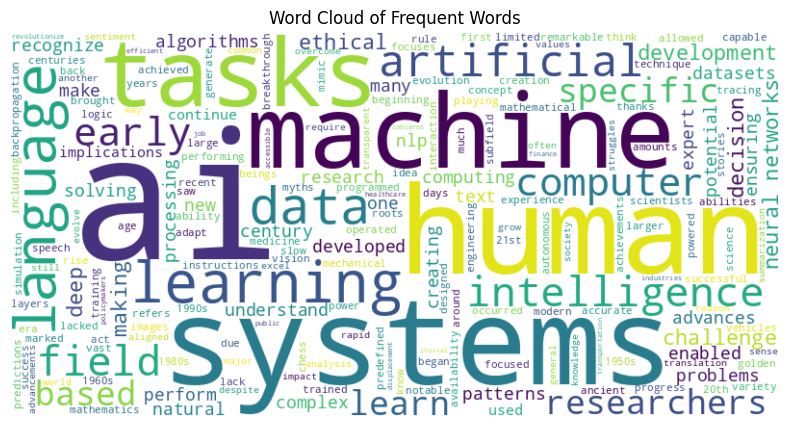

In [23]:
# Importing data from Google Drive (Specific to Part B)
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/Colab Notebooks/dataset/nlp/ai.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Print the first 500 characters to verify the content
print(text[:500])

# Preprocessing
text = text.lower()
tokens = word_tokenize(text)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

# 1. Count unique tokens
unique_tokens = set(tokens)
print(f"Number of unique tokens: {len(unique_tokens)}")

# 2. Count punctuation characters
punctuation_count = sum(1 for char in text if char in string.punctuation)
print(f"Number of punctuation characters: {punctuation_count}")

# 3. Plot POS tag distribution (Green)
pos_tags = pos_tag(filtered_tokens)
pos_tag_freq = FreqDist(tag for _, tag in pos_tags)
plt.figure(figsize=(10, 6))
plt.bar(pos_tag_freq.keys(), pos_tag_freq.values(), color='green')
plt.title("Distribution of POS Tags")
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Determine unique lemmas
unique_lemmas = set(lemmatized_tokens)
print(f"Number of unique lemmas: {len(unique_lemmas)}")

# 5. Plot stopword distribution (Orange)
stopword_freq = Counter(word for word in tokens if word in stop_words)
plt.figure(figsize=(10, 6))
plt.bar(stopword_freq.keys(), stopword_freq.values(), color='orange')
plt.xlabel("Stopwords")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.title("Distribution of Stopwords")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 6. Display the Top 10 Most Frequent Words
word_freq = Counter(filtered_tokens)
top_words = word_freq.most_common(10)  # Get the 10 most common words
print("\nTop 10 Most Frequent Words:")
for word, freq in top_words:
    print(f"{word}: {freq}")

# 7. Generate and Display Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(filtered_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Frequent Words")
plt.show()
